In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from functions import *

DATA_DIR = '../data'

In [2]:
df = pd.read_json(f'{DATA_DIR}/quotebank_attr_2015-2020.json.bz2', compression='bz2')
preprocess_dataframe(df, handle_birth_dates=True)

In [3]:
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains
0,2015-10-05-010038,At Neath Food Festival with a vegetarian platt...,Bethan Jenkins,[Q4897688],2015-10-05 05:00:00,1,"[[Bethan Jenkins, 0.8565], [None, 0.1435]]",[http://www.southwales-eveningpost.co.uk/Town-...,E,Q4897688,None,None,NaT,None,None,None,None,[southwales-eveningpost.co.uk]
1,2015-11-28-006688,"But if I had to choose my favourite recipe, it...",Trish Deseine,[Q7843986],2015-11-28 00:00:00,1,"[[Trish Deseine, 0.7664], [None, 0.1125], [Kei...",[http://www.irishexaminer.com/lifestyle/featur...,E,Q7843986,None,None,NaT,None,None,None,None,[irishexaminer.com]
2,2015-11-10-015422,"Children are learning about responsibility, te...",David Price,"[Q1176177, Q16063598, Q20804677, Q20973688, Q3...",2015-11-10 19:30:41,1,"[[David Price, 0.7849], [None, 0.2151]]",[http://news.ifas.ufl.edu/2015/11/ufifas-bok-t...,E,None,None,None,NaT,None,None,None,None,[ufl.edu]
3,2015-01-16-054273,Once we have added all the vegetables and stoc...,NaN,[],2015-01-16 11:40:11,4,"[[None, 0.6778], [Catherine O'Neill, 0.3222]]",[http://www.bromsgrovestandard.co.uk/2015/01/1...,E,None,None,None,NaT,None,None,None,None,"[bromsgrovestandard.co.uk, bromsgrovestandard...."
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,[male],[United States of America],1966-07-07,None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com]


In [4]:
df_sentiments = extend_with_sentiment_polarity_scores(df)

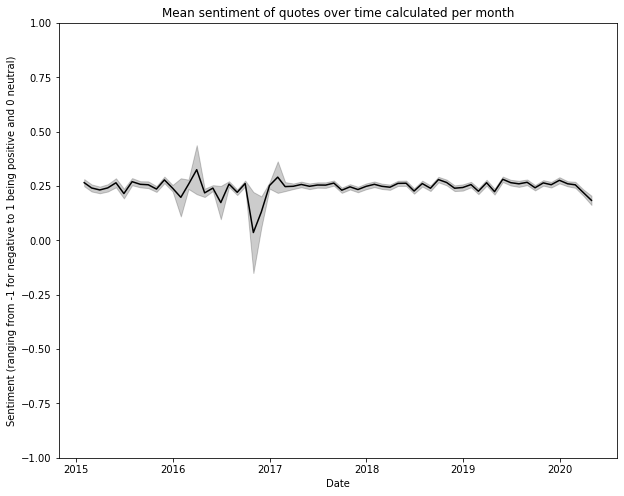

In [5]:
compound_per_month = group_by_date_col(df_sentiments, 'date', freq='M')\
    .agg({'compound': ['mean', 'sem'] })\
    .reset_index()

fig, ax = plt.subplots(figsize=(10, 8))
show_mean_with_sem(ax, 
    compound_per_month['date'], 
    compound_per_month['compound']['mean'], 
    compound_per_month['compound']['sem'], 
    color='black')
ax.set(title='Mean sentiment of quotes over time calculated per month',
    xlabel='Date', ylabel='Sentiment (ranging from -1 for negative to 1 being positive and 0 neutral)')
plt.ylim([-1, 1])
plt.show()

# Professions

In [6]:
df_sentiments.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,...,date_of_birth,ethnic_group,occupation,party,academic_degree,domains,neg,neu,pos,compound
0,2015-10-05-010038,At Neath Food Festival with a vegetarian platt...,Bethan Jenkins,[Q4897688],2015-10-05 05:00:00,1,"[[Bethan Jenkins, 0.8565], [None, 0.1435]]",[http://www.southwales-eveningpost.co.uk/Town-...,E,Q4897688,...,NaT,None,None,None,None,[southwales-eveningpost.co.uk],0.000,0.630,0.370,0.5707
1,2015-11-28-006688,"But if I had to choose my favourite recipe, it...",Trish Deseine,[Q7843986],2015-11-28 00:00:00,1,"[[Trish Deseine, 0.7664], [None, 0.1125], [Kei...",[http://www.irishexaminer.com/lifestyle/featur...,E,Q7843986,...,NaT,None,None,None,None,[irishexaminer.com],0.000,1.000,0.000,0.0000
2,2015-11-10-015422,"Children are learning about responsibility, te...",David Price,"[Q1176177, Q16063598, Q20804677, Q20973688, Q3...",2015-11-10 19:30:41,1,"[[David Price, 0.7849], [None, 0.2151]]",[http://news.ifas.ufl.edu/2015/11/ufifas-bok-t...,E,None,...,NaT,None,None,None,None,[ufl.edu],0.000,0.739,0.261,0.8020
3,2015-01-16-054273,Once we have added all the vegetables and stoc...,NaN,[],2015-01-16 11:40:11,4,"[[None, 0.6778], [Catherine O'Neill, 0.3222]]",[http://www.bromsgrovestandard.co.uk/2015/01/1...,E,None,...,NaT,None,None,None,None,"[bromsgrovestandard.co.uk, bromsgrovestandard....",0.056,0.706,0.238,0.8004
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,...,1966-07-07,None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com],0.000,1.000,0.000,0.0000


In [11]:
import matplotlib.patches as mpatches

def show_attr_sentiment_evolution(df, attr_name, cutoff, freq):
    """Plots sentiment over time for attribute attr_name over time for values
    over the given frequency appearing at least cutoff times in the whole dataset
    """
    fig, ax = plt.subplots(figsize=(14, 10))
    colors = ['blue', 'red', 'green', 'yellow', 'brown', 'orange']
    handles = []
    for i, value in enumerate(get_top_entries(df_sentiments, attr_name, cutoff)):
        val_df = df[get_multivalue_col_mask(df, attr_name, value)]

        attr_compound_evolution = group_by_date_col(val_df, 'date', freq=freq)\
            .agg({'compound': ['mean', 'sem'] })\
            .reset_index()
        color = colors[i % len(colors)]
        handles.append(mpatches.Patch(color=color, label=value))

        show_mean_with_sem(ax, 
            attr_compound_evolution['date'], 
            attr_compound_evolution['compound']['mean'], 
            attr_compound_evolution['compound']['sem'], 
            color=color)
    ax.set(title=f'Mean sentiment of quotes over time calculated per month for attribute \'{attr_name}\'',
        xlabel='Date', ylabel='Sentiment (ranging from -1 for negative to 1 being positive and 0 neutral)')
    ax.legend(handles=handles, title=f'Attribute value')
    plt.ylim([-1, 1])
    plt.show()

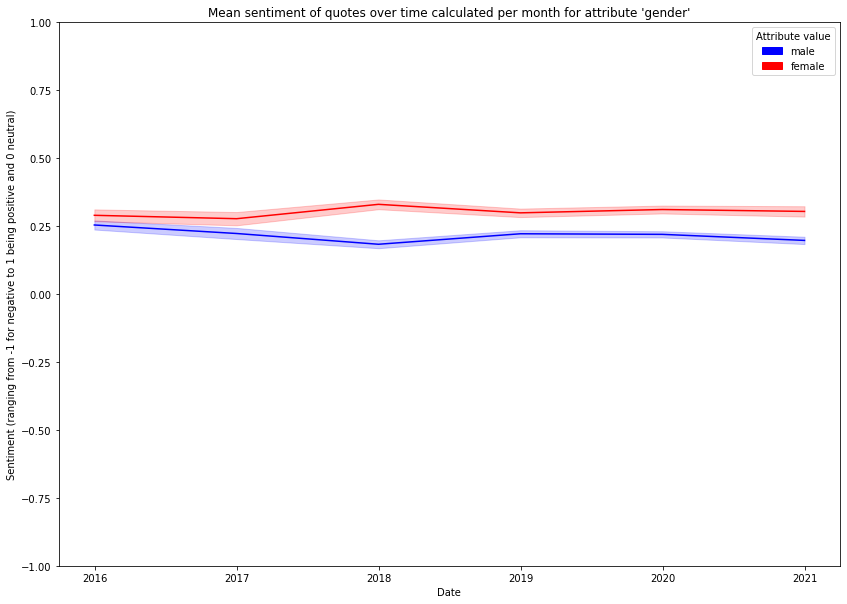

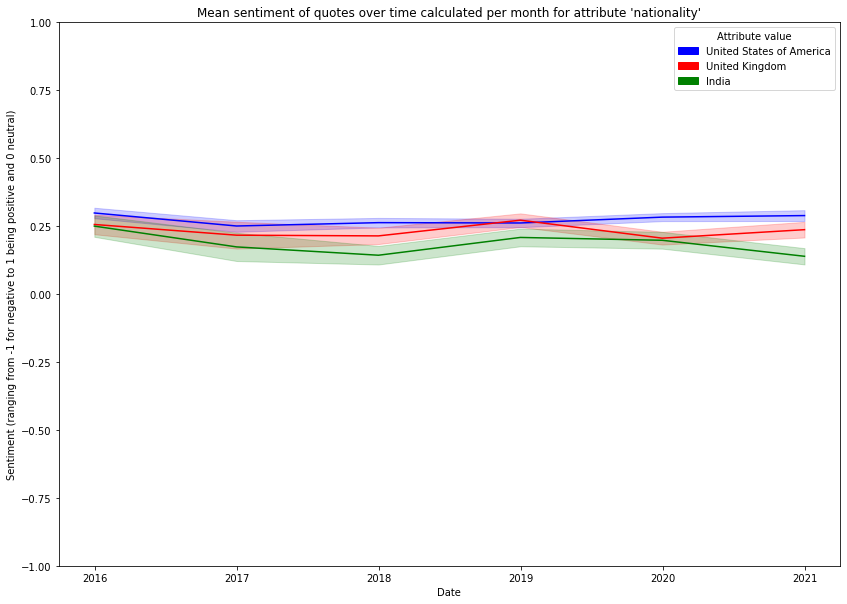

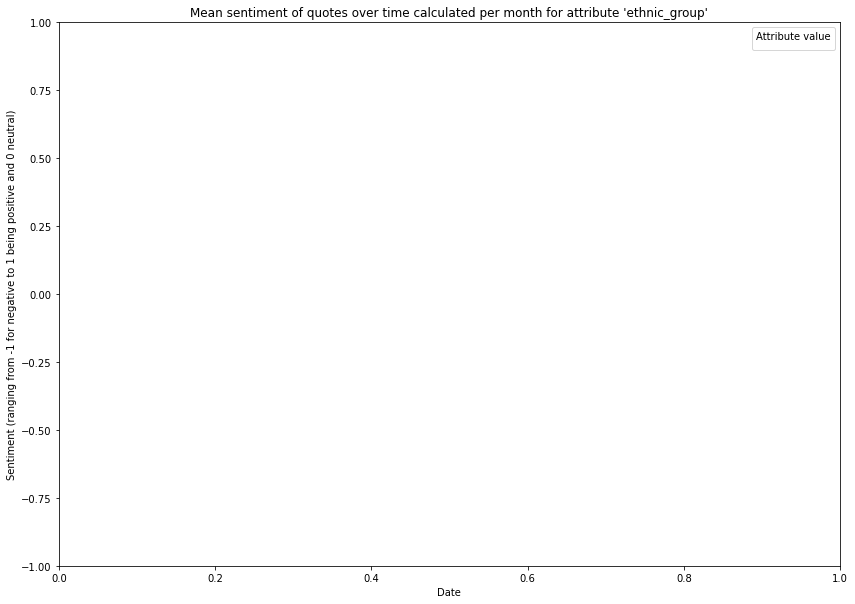

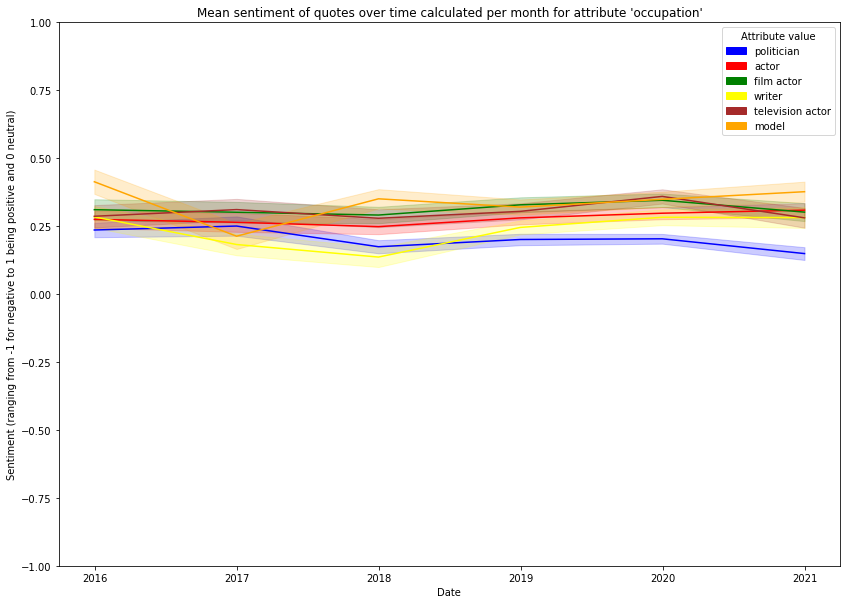

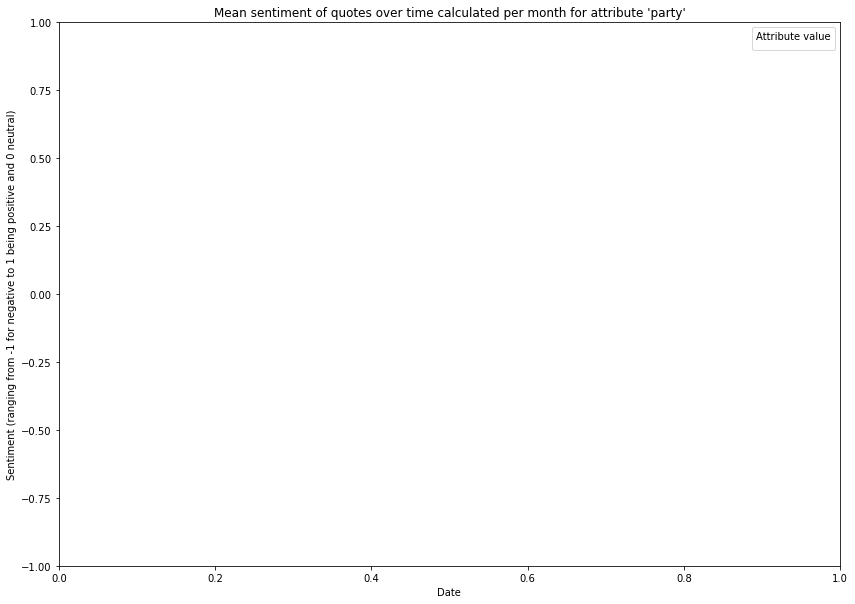

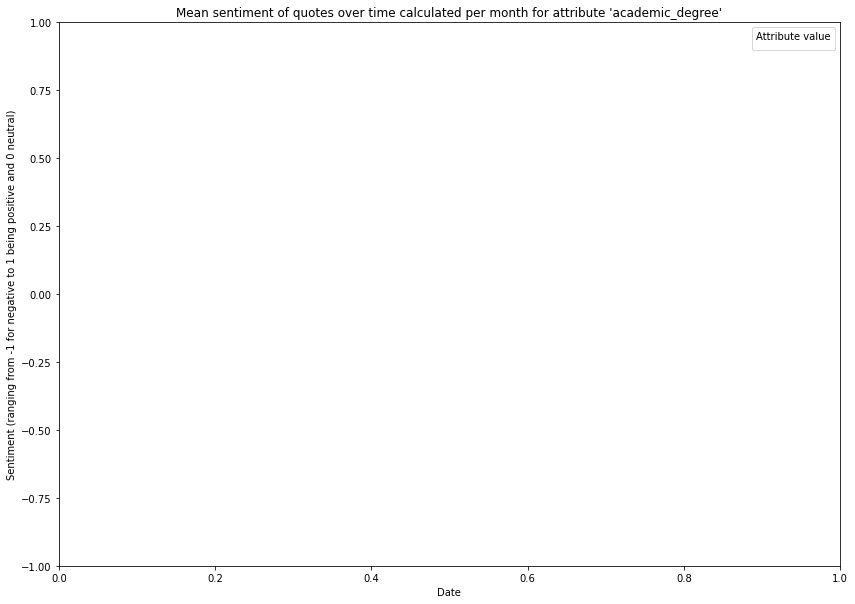

In [12]:
cols_to_visualize_sentiment_evolution = ['gender', 'nationality',
       'ethnic_group', 'occupation', 'party',
       'academic_degree']
for attr_name in cols_to_visualize_sentiment_evolution:
    show_attr_sentiment_evolution(df_sentiments, attr_name=attr_name, cutoff=1000, freq='Y')